In [49]:
from chxanalys.chx_packages import *
%matplotlib notebook
plt.rcParams.update({'figure.max_open_warning': 0})
#%reset -f  #for clean up things in the memory

# Define Result Path here

In [50]:
data_dir = '/XF11ID/analysis/2017_1/manisen/Results/'

# Build a uid dictionary here

In [51]:
suid_dict = {'Temp=180C_c_1' :'9874fe','Temp=180C_c_2' :'8a1c3b', 
             'Temp=180C_c_3' :'173041', 'Temp=180C_c_4' :'23e353','Temp=180C_c_5' :'f0d1c5' }

In [52]:
uid_dict = {}
for u in list( suid_dict.keys() ):
    uid_dict[u] =  get_meta_data( suid_dict[u] )['uid']
print( uid_dict )

{'Temp=180C_c_4': '23e35382-5cb9-43cc-8096-6c8030b82f67', 'Temp=180C_c_3': '17304116-27c6-4160-94ce-ec3bd8487e86', 'Temp=180C_c_1': '9874fe88-4ee5-4e97-874c-d19be5107756', 'Temp=180C_c_2': '8a1c3b5f-8d12-4f69-8b4c-91ded5f5b99b', 'Temp=180C_c_5': 'f0d1c5e5-bc48-4f87-b184-83a360ad287d'}


# Extract result here

In [53]:
total_res = {}

In [54]:
for u in list( uid_dict.keys() ):
    inDir =  data_dir + suid_dict[u] + '/'
    total_res[u] = extract_xpcs_results_from_h5( filename = 'uid=%s_Res.h5'%uid_dict[u], import_dir = inDir )
    

In [55]:
print( total_res[list( uid_dict.keys() )[0]].keys()  )

dict_keys(['qval_dict_v', 'q_saxs', 'pixel_mask', 'imgsum', 'avg_img', 'g2', 'g2b', 'mean_int_sets', 'times_roi', 'g4', 'iq_saxs', 'iqst', 'qval_dict', 'tausb', 'g12b', 'g2_fit_paras', 'g2b_fit_paras', 'mask', 'taus4', 'md', 'qt', 'taus', 'qval_dict_p', 'roi_mask', 'bad_frame_list'])


# Do some analysis here

### 1) plot g4

In [56]:
qth_interest = 9 #3      #the intested single qth 

<IPython.core.display.Javascript object>


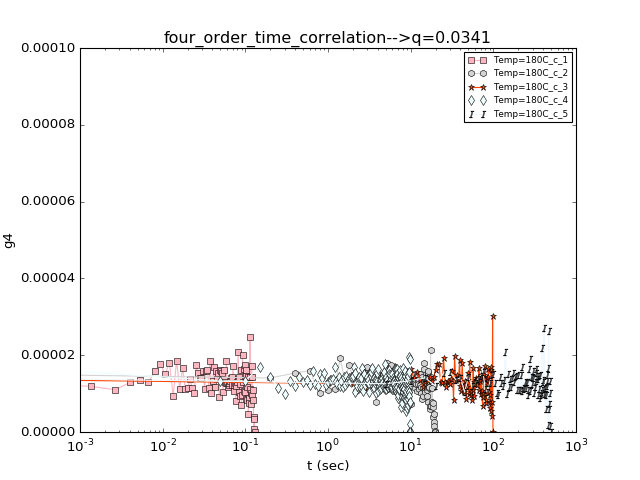

Temp=180C_c_1
Temp=180C_c_2
Temp=180C_c_3
Temp=180C_c_4
Temp=180C_c_5


In [57]:
fig,ax=plt.subplots()
for u in sorted(list( uid_dict.keys() )):
    print(u)
    plot1D( x =  total_res[u]['taus4'], y= total_res[u]['g4'][:,qth_interest],
                   ax=ax, legend= u, ylim=[0, 0.0001], legend_size = 8, xlabel='t (sec)', ylabel='g4',
           title='four_order_time_correlation-->q=%s'%total_res[u]['qval_dict'][qth_interest][0], logx=True )
    
plt.savefig( data_dir +'g4_101k44pc_180_new_5.png' )    

### 2) plot g2

<IPython.core.display.Javascript object>


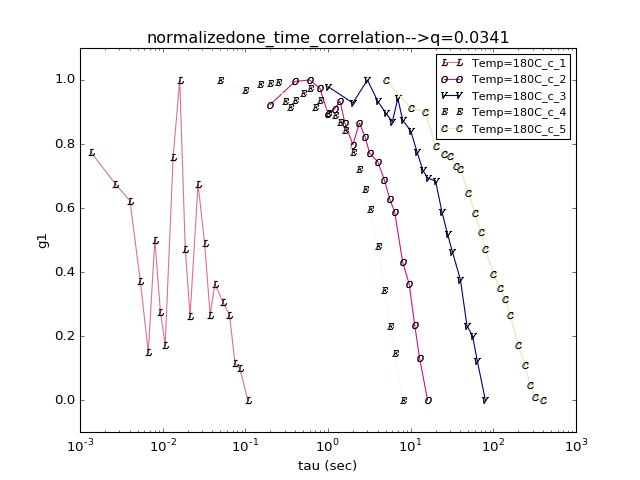

In [58]:
fig,ax=plt.subplots()
for u in sorted(list( uid_dict.keys() )):
    y= total_res[u]['g2'][1:,qth_interest]
    ym = (y-y.min())/(y.max()-y.min())    
    plot1D( x =  total_res[u]['taus'][1:], y= ym,
                   ax=ax, legend= u, ylim=[-0.1, 1.1], legend_size = 10, xlabel='tau (sec)', ylabel='g1',
           title='normalized' +'one_time_correlation-->q=%s'%total_res[u]['qval_dict'][qth_interest][0], logx=True )
plt.savefig( data_dir +'normalized'+'g__101k44pc_180_new_5.png' ) 

<IPython.core.display.Javascript object>


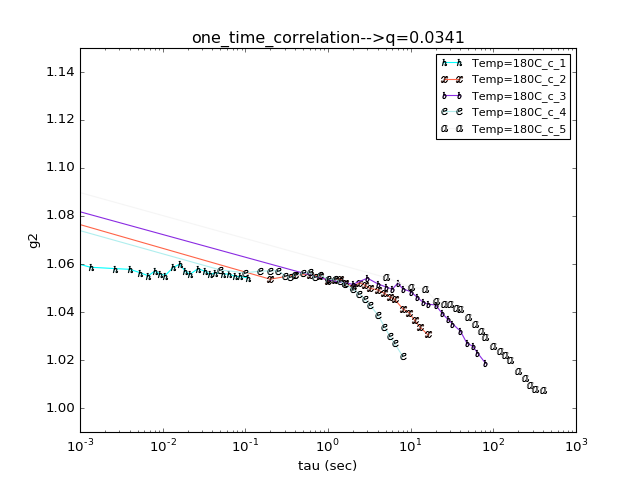

In [59]:
fig,ax=plt.subplots()
for u in sorted(list( uid_dict.keys() )):
    plot1D( x =  total_res[u]['taus'], y= total_res[u]['g2'][:,qth_interest],
                   ax=ax, legend= u, ylim=[0.99, 1.15], legend_size = 10, xlabel='tau (sec)', ylabel='g2',
           title='one_time_correlation-->q=%s'%total_res[u]['qval_dict'][qth_interest][0], logx=True )
plt.savefig( data_dir +'g2_101k44pc_180_new_5.png' )  

### 3) Plot q~relaxation time

In [60]:
qs = np.array([total_res[u]['qval_dict'][i][0] for i in range(   len(list(total_res[u]['qval_dict'].keys()))   ) ])

<IPython.core.display.Javascript object>


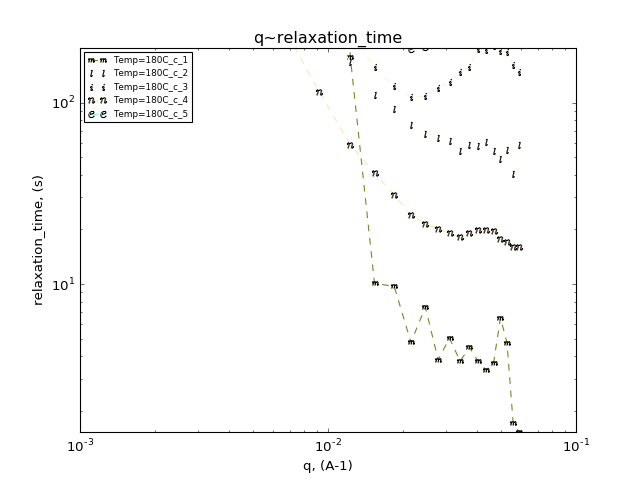

In [61]:
fig,ax=plt.subplots()
for u in sorted(list( uid_dict.keys() )):
    x= qs
    y= 1/total_res[u]['g2_fit_paras']['relaxation_rate']
    #print(y)
    plot1D( x =  qs, y= y, ax=ax, ylim=[0,200], legend= u, legend_size = 8, ls = '--',
           xlabel='q, (A-1)', ylabel='relaxation_time, (s)',
           title='q~relaxation_time', logx=True, logy=True )
plt.savefig( data_dir +'q~relaxation_time.png' )  